In [1]:
import numpy as np
import pandas as pd
import random
from datetime import datetime
import matplotlib.pyplot as plt
from pprint import pprint

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")

2023-06-09 11:38:11.622449: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 11:38:11.655521: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 11:38:11.656367: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 11:38:12.476020: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset = pd.read_csv("../StationDateDatasets/datasetStationDate.csv").drop(columns=["Unnamed: 0"])

In [3]:
cols = ["StationEnd", "WorkingDay", "Hour", "Count", "Count1", "Count1week", "Count2week", "Count3week", "Temp", "ATemp"]

epochs = 30
batch_size = 1
verbose = 2

In [4]:
met1 = dataset[[col for col in dataset.columns if col in cols]]

X = met1.drop(columns=["Count"])
y = met1["Count"]

X = np.reshape(X.values, (X.shape[0], 1, X.shape[1]))

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=False)

acc_per_fold = []
loss_per_fold = []

model_met1 = Sequential()
model_met1.add(LSTM(4, input_shape=(1,met1.shape[1]-1)))
model_met1.add(Dense(1))
model_met1.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])

# K-fold Cross Validation model evaluation
for train, test in kfold.split(X, y):
    model_met1.fit(X[train], y[train], epochs=epochs, batch_size=batch_size, verbose=verbose)

    # Generate generalization metrics
    scores = model_met1.evaluate(X[test], y[test], verbose=0)
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
mean = np.mean(loss_per_fold)
print(f'> Loss: {mean}')
print('------------------------------------------------------------------------')

2023-06-09 17:57:06.186254: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-09 17:57:06.186851: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/30


2023-06-09 17:57:06.530731: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-09 17:57:06.532241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-09 17:57:06.533256: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

183062/183062 - 163s - loss: 4.1522 - accuracy: 0.3200 - 163s/epoch - 892us/step
Epoch 2/30
183062/183062 - 150s - loss: 3.9564 - accuracy: 0.3202 - 150s/epoch - 820us/step
Epoch 3/30
183062/183062 - 151s - loss: 3.9247 - accuracy: 0.3202 - 151s/epoch - 826us/step
Epoch 4/30
183062/183062 - 151s - loss: 3.9026 - accuracy: 0.3199 - 151s/epoch - 827us/step
Epoch 5/30
183062/183062 - 152s - loss: 3.8742 - accuracy: 0.3196 - 152s/epoch - 828us/step
Epoch 6/30
183062/183062 - 152s - loss: 3.8583 - accuracy: 0.3195 - 152s/epoch - 828us/step
Epoch 7/30
183062/183062 - 152s - loss: 3.8363 - accuracy: 0.3195 - 152s/epoch - 833us/step
Epoch 8/30
183062/183062 - 152s - loss: 3.8164 - accuracy: 0.3193 - 152s/epoch - 829us/step
Epoch 9/30
183062/183062 - 152s - loss: 3.7943 - accuracy: 0.3195 - 152s/epoch - 829us/step
Epoch 10/30
183062/183062 - 152s - loss: 3.7904 - accuracy: 0.3196 - 152s/epoch - 828us/step
Epoch 11/30
183062/183062 - 152s - loss: 3.7842 - accuracy: 0.3198 - 152s/epoch - 828us/st

2023-06-09 19:13:10.336874: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-09 19:13:10.338323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-09 19:13:10.339320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/30
183062/183062 - 155s - loss: 3.6072 - accuracy: 0.3325 - 155s/epoch - 846us/step
Epoch 2/30
183062/183062 - 154s - loss: 3.6024 - accuracy: 0.3330 - 154s/epoch - 843us/step
Epoch 3/30
183062/183062 - 155s - loss: 3.6072 - accuracy: 0.3329 - 155s/epoch - 845us/step
Epoch 4/30
183062/183062 - 154s - loss: 3.6048 - accuracy: 0.3329 - 154s/epoch - 844us/step
Epoch 5/30
183062/183062 - 154s - loss: 3.6033 - accuracy: 0.3329 - 154s/epoch - 842us/step
Epoch 6/30
183062/183062 - 154s - loss: 3.6073 - accuracy: 0.3327 - 154s/epoch - 842us/step
Epoch 7/30
183062/183062 - 154s - loss: 3.6025 - accuracy: 0.3327 - 154s/epoch - 842us/step
Epoch 8/30
183062/183062 - 155s - loss: 3.6022 - accuracy: 0.3326 - 155s/epoch - 844us/step
Epoch 9/30
183062/183062 - 154s - loss: 3.6039 - accuracy: 0.3327 - 154s/epoch - 843us/step
Epoch 10/30
183062/183062 - 154s - loss: 3.5991 - accuracy: 0.3329 - 154s/epoch - 842us/step
Epoch 11/30
183062/183062 - 154s - loss: 3.6025 - accuracy: 0.3328 - 154s/epoch

Text(0.5, 0, 'Methods')

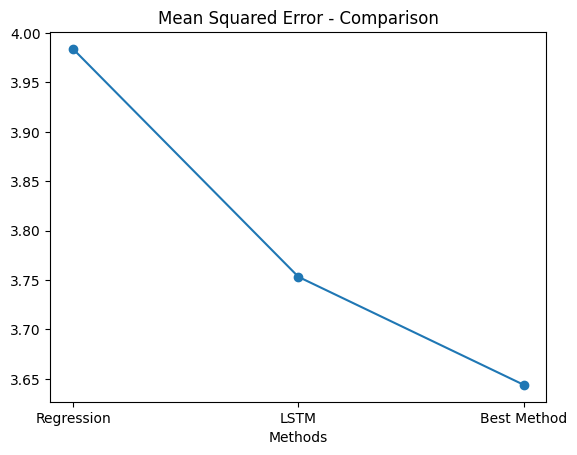

In [5]:
plt.plot(["Regression", "LSTM", "Best Method"], [3.9839102446556587, 3.7531802654266357, 3.643830752372742], marker="o")
plt.title("Mean Squared Error - Comparison")
plt.xlabel("Methods")